In [1]:
import numpy as np
import pandas as pd
import nltk
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.manifold import MDS
from sklearn.cluster import KMeans
import os
from sklearn.feature_extraction.text import TfidfVectorizer

In [2]:
data= pd.read_csv("C://Users/Saba Naseem/Desktop/Machine Learning/Codes/kaggle/Document Clustering/movies.csv")

In [3]:
data.head()

,title,link,syn_link,genres,plot_synopsis
0,The Shawshank Redemption,https://www.imdb.com/title/tt0111161/?pf_rd_m=...,https://www.imdb.com/title/tt0111161/synopsis?...,[' Drama'],"In 1947, Andy Dufresne (Tim Robbins), a banker..."
1,The Godfather,https://www.imdb.com/title/tt0068646/?pf_rd_m=...,https://www.imdb.com/title/tt0068646/synopsis?...,"[' Crime', ' Drama']","In late summer 1945, guests are gathered for t..."
2,The Godfather: Part II,https://www.imdb.com/title/tt0071562/?pf_rd_m=...,https://www.imdb.com/title/tt0071562/synopsis?...,"[' Crime', ' Drama']",The Godfather Part II presents two parallel st...
3,The Dark Knight,https://www.imdb.com/title/tt0468569/?pf_rd_m=...,https://www.imdb.com/title/tt0468569/synopsis?...,"[' Action', ' Crime', ' Drama', ' Thriller']",The movie begins with a gang of men with clown...
4,12 Angry Men,https://www.imdb.com/title/tt0050083/?pf_rd_m=...,https://www.imdb.com/title/tt0050083/synopsis?...,[' Drama'],"In a New York City courthouse, an eighteen-yea..."


In [4]:
data.columns

Index(['title', 'link', 'syn_link', 'genres', 'plot_synopsis'], dtype='object')

In [4]:
title, synopsis, genre= data['title'], data['plot_synopsis'], data['genres']

In [13]:
synopsis[0][:200]

'In 1947, Andy Dufresne (Tim Robbins), a banker in Maine, is convicted of murdering his wife and her lover, a golf pro. Since the state of Maine has no death penalty, he is given two consecutive life s'

In [17]:
ranks = []

for i in range(0,len(title)):
    ranks.append(i)

### Text Preprocessing
##### Tokenizing & Stemming

Tokenizing is a process to break an input stream of text into tokens. A token can be a sentence or an individual word.

Stemming is a process of converting words of a sentence to its non-changing portions like 

In [6]:
def tokenizing(text):
    
    #breaking each word and making them tokens
    tokens=[word.lower() for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    
    #storing only alpha tokens
    filtered_tokens=[]
    for token in tokens:
        if (re.search('[a-zA-Z]', token)):
            filtered_tokens.append(token)

    return filtered_tokens


from nltk.stem.snowball import SnowballStemmer
stemmer= SnowballStemmer("english")

def stemming(text):
    
    stems =[stemmer.stem(t) for t in text]
    return stems

def token_stems(text):
        
    tokens=tokenizing(text) 
    stems=stemming(tokens)
   
    return stems       

In [119]:
a= token_stems(synopsis[0])
a[:10]

['in', 'andi', 'dufresn', 'tim', 'robbin', 'a', 'banker', 'in', 'main', 'is']

In [7]:
tokenized_only_vocab=[ tokenizing(word) for word in synopsis]
stemmed_vocab=[ stemming(token) for token in tokenized_only_vocab]

In [86]:
len(stemmed_vocab), len(tokenized_only_vocab)

(100, 100)

### TF-IDF vectorization

In [8]:
tfidf= TfidfVectorizer(max_df=0.8, max_features=200000, min_df=0.2, stop_words='english',
                      use_idf=True, tokenizer=token_stems, ngram_range=(1,3))

tfidf_matriz= tfidf.fit_transform(synopsis)

print(tfidf_matriz.shape)

terms=tfidf.get_feature_names()

Wall time: 18.7 s
(100, 612)


In [9]:
from sklearn.metrics.pairwise import cosine_similarity
dist = 1 - cosine_similarity(tfidf_matriz)

In [46]:
t=tfidf.vocabulary_

In [48]:
aa=tfidf.stop_words_

### K Mean Clustering

In [95]:
kmean= KMeans(5)

kmean.fit(tfidf_matriz)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [24]:
clusters= kmean.labels_
clusters

array([2, 2, 2, 1, 4, 3, 1, 1, 1, 1, 1, 4, 1, 4, 3, 3, 2, 1, 3, 0, 2, 1,
       2, 4, 2, 1, 2, 1, 1, 4, 0, 4, 4, 4, 4, 1, 2, 4, 2, 2, 4, 4, 0, 4,
       4, 1, 1, 3, 1, 3, 0, 1, 4, 2, 3, 2, 2, 3, 1, 1, 4, 1, 1, 1, 4, 4,
       1, 4, 1, 2, 2, 3, 4, 3, 4, 4, 4, 3, 4, 4, 2, 2, 2, 4, 3, 2, 0, 1,
       4, 1, 2, 4, 0, 1, 3, 3, 2, 4, 2, 1])

In [96]:
films=pd.DataFrame({'title': title, 'rank': ranks, 'synopsis': synopsis, 'cluster': clusters, 'genre': genre})

films.head()

,title,rank,synopsis,cluster,genre
0,The Shawshank Redemption,0,"In 1947, Andy Dufresne (Tim Robbins), a banker...",2,[' Drama']
1,The Godfather,1,"In late summer 1945, guests are gathered for t...",2,"[' Crime', ' Drama']"
2,The Godfather: Part II,2,The Godfather Part II presents two parallel st...,2,"[' Crime', ' Drama']"
3,The Dark Knight,3,The movie begins with a gang of men with clown...,1,"[' Action', ' Crime', ' Drama', ' Thriller']"
4,12 Angry Men,4,"In a New York City courthouse, an eighteen-yea...",4,[' Drama']


In [27]:
films['cluster'].value_counts()

4    29
1    28
2    23
3    14
0     6
Name: cluster, dtype: int64

### Visualization of Clusters.

First let's find cluster names the words that are closest to each cluster centroid.

In [97]:
order_centroids = kmean.cluster_centers_.argsort()[:, ::-1]

for i in range(5):
    print("Cluster",i,": ")
    for j in order_centroids[i, :10]:
        print(' %s' % terms[j])  

Cluster 0 : 
 war
 soldier
 kill
 men
 armi
 command
 shoot
 film
 order
 offic
Cluster 1 : 
 say
 n't
 ask
 car
 man
 polic
 come
 doe
 room
 look
Cluster 2 : 
 ship
 destroy
 ring
 captain
 forc
 armi
 power
 kill
 battl
 death
Cluster 3 : 
 evid
 boy
 defend
 murder
 wit
 chang
 film
 question
 reason
 decid
Cluster 4 : 
 famili
 father
 kill
 son
 friend
 daughter
 meet
 live
 visit
 ask


In [90]:
#set up colors per clusters
cluster_colors = {0: 'red', 1: 'blue', 2: 'green', 3: 'yellow', 4: 'orange'}

#set up cluster names
cluster_names = {0: 'Mystery, Relationship, Memories', 
                 1: 'Ship, Ring, Men', 
                 2: 'Family, Friends, laugh', 
                 3: 'Army, battle, kill', 
                 4: 'Father, school, car'}

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


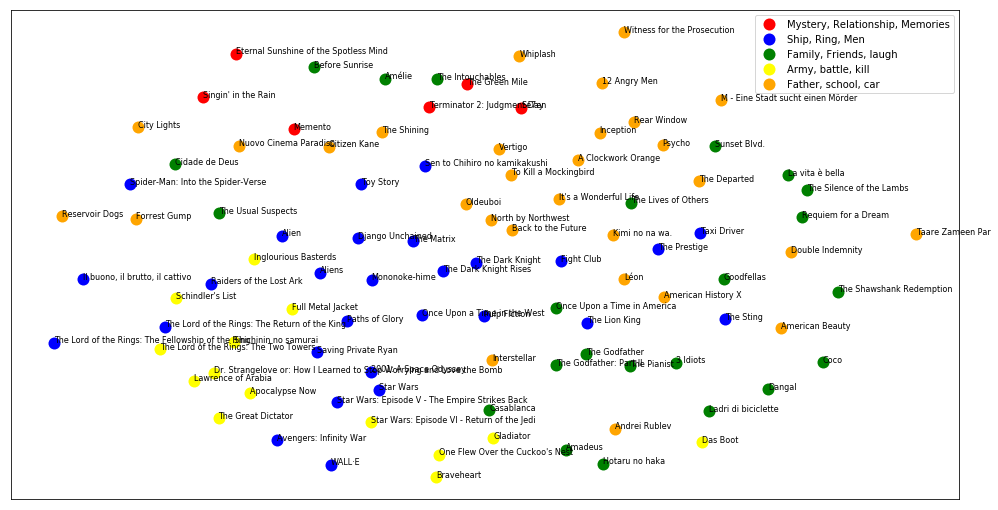

In [103]:
mds = MDS(n_components=2, dissimilarity="precomputed", random_state=1)

pos = mds.fit_transform(dist)

xs, ys = pos[:, 0], pos[:, 1]

df = pd.DataFrame(dict(x=xs, y=ys, label=clusters, title=title)) 

groups = df.groupby('label')

fig, ax = plt.subplots(figsize=(17, 9)) 

ax.margins(0.05) 

for name, group in groups:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=12, label=cluster_names[name], color=cluster_colors[name], mec='none')
    ax.set_aspect('auto')
    ax.tick_params(axis='x',which='both',bottom='off',top='off',labelbottom='off')
    ax.tick_params(axis= 'y',which='both',left='off',top='off',labelleft='off')
    
ax.legend(numpoints=1)

for i in range(len(df)):
    ax.text(df.ix[i]['x'], df.ix[i]['y'], df.ix[i]['title'], size=8)  
    
plt.show()